In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv("datos/MexicoCaseStudy.csv")

In [ ]:
cont=0
for i in list(df.columns):
    for j in range(df.shape[0]):
        if df[i][j]==" ":
            cont+=1
print(cont) #no hay datos vacíos

In [ ]:
lista2=[]
for i in list(df["ADM2NAME"]):
    if "?" in i:
        if i not in lista2:
            lista2.append(i)
print(lista2) 

In [3]:
lista1=[]
for i in list(df["ADM1NAME"]):
    if "?" in i:
        if i not in lista1:
            lista1.append(i)
print(lista1)

['Nuevo Le?n', 'San Luis Potos?', 'Quer?taro de Arteaga', 'M?xico']


4

In [3]:
df=df.replace("Nuevo Le?n","Nuevo León")
df=df.replace("San Luis Potos?","San Luis Potosí")
df=df.replace("Quer?taro de Arteaga","Querétaro de Arteaga")
df=df.replace("M?xico","México")

df=df.drop(["MUNIG_","MUNIG_ID","ADM1CODE","ADM2CODE"],axis=1)
#elimino estas columnas porque son de un código propio de México para nombrar estados y municipalidades
#que no tengo idea de como funciona
#Además ya tengo los nombres de esos estados y municipalidades
#El p
df=df.drop(["PERIMETER","MEANILIT15","MEANSELE15","MEANCELE15","MEANSSEC15","MEANCSEC15","MEANY2000","MEANY2002","FOODEXP","POPDENS"],axis=1)

NuevosNombresColumnas={"ADM1NAME": "ESTADOS", 
                        "ADM2NAME": "MUNICIPIOS",
                        "RURPER":"POBLACION RURAL",
                        "FGT_0RUR00":"POBREZA ALIMENTARIA 2000",
                        "FGT_0RUR02":"POBREZA ALIMENTARIA 2002",
                        "ACCESO":"ACCESO (min)"
                      } 
df=df.rename(columns=NuevosNombresColumnas)
df=df.drop_duplicates(["MUNICIPIOS"], keep='last', ignore_index=True) #elimino los municipios repetidos
df=df.sort_values("ESTADOS",ignore_index=True)
df.to_csv("datos/MexicoPobrezaOrdenado.csv", index=False)

arregloEstados=df["ESTADOS"].unique()
arregloEstados=np.sort(arregloEstados)
indices=np.arange(0,arregloEstados.shape[0])
Estados=pd.DataFrame(arregloEstados,columns=["ESTADO"],index=indices)#dataframe de una columna con los estados

print("Buscando municipios mas apartados...")
dfMasApartados=pd.DataFrame(columns=["ESTADOS","MUNICIPIOS","ACCESO (min)"])
for i in range(Estados.shape[0]):
    estado=Estados["ESTADO"][i]
    dfPorEstado1=df.loc[df["ESTADOS"]==estado]
    MasApartados=dfPorEstado1.sort_values("ACCESO (min)", ascending=False, ignore_index=True)[0:3]
    MasApartados=MasApartados.loc[:,["ESTADOS","MUNICIPIOS","ACCESO (min)"]]
    dfMasApartados=pd.concat([dfMasApartados, MasApartados],axis=0, ignore_index=True)
dfMasApartados.to_csv("datos/MunicipiosMasApartados.csv", index=False)
print("finalizado")

print("Buscando promedio de población rural...")
dfRURAL=pd.DataFrame(columns=["ESTADOS","POBLACION RURAL (MEDIA)"])
for i in range(Estados.shape[0]):
    estado=Estados["ESTADO"][i]
    dfPorEstado2=df.loc[df["ESTADOS"]==estado]
    mediaRural=dfPorEstado2["POBLACION RURAL"].mean()
    fila=pd.DataFrame([[Estados["ESTADO"][i],mediaRural]],columns=dfRURAL.columns)
    dfRURAL=dfRURAL.append(fila, ignore_index=True)
dfRURAL=dfRURAL.sort_values("POBLACION RURAL (MEDIA)", ascending=False,ignore_index=True)
dfRURAL.to_csv("datos/MayorPoblacionRural.csv", index=False)
print("finalizado")


#POBREZA ALIMENTARIA 2002 y POBREZA ALIMENTARIA 2000 son la fracción prevista de hogares rurales por debajo del umbral de pobreza alimentaria en 2002 y 2000
#a continuación las convierto en porcentaje y busco la diferencia
print("iniciando filtrado según pobreza alimentaria")
dfDIFERENCIA=pd.DataFrame(columns=["ESTADOS","MUNICIPIOS","POBREZA ALIMENTARIA 2000","POBREZA ALIMENTARIA 2002","DIFERENCIA"])
filaDiferencia=[]
for i in range(df.shape[0]):
    df["POBREZA ALIMENTARIA 2000"][i]*=100
    df["POBREZA ALIMENTARIA 2002"][i]*=100
    diferencia=df["POBREZA ALIMENTARIA 2000"][i]-df["POBREZA ALIMENTARIA 2002"][i]
    filaDiferencia.append(diferencia)
df["DIFERENCIA"]=filaDiferencia
for i in range (Estados.shape[0]):
    estado=Estados["ESTADO"][i]
    dfPorEstado3=df.loc[df["ESTADOS"]==estado]
    dfPorEstado3=dfPorEstado3.sort_values("DIFERENCIA", ascending=False, ignore_index=True)
    nuevaFila1=dfPorEstado3.iloc[[0]]
    nuevaFila1=nuevaFila1.loc[:,["ESTADOS","MUNICIPIOS","POBREZA ALIMENTARIA 2000","POBREZA ALIMENTARIA 2002","DIFERENCIA"]]
    nuevaFila2=dfPorEstado3.iloc[[-1]] 
    nuevaFila2=nuevaFila2.loc[:,["ESTADOS","MUNICIPIOS","POBREZA ALIMENTARIA 2000","POBREZA ALIMENTARIA 2002","DIFERENCIA"]]
    dfDIFERENCIA=pd.concat([dfDIFERENCIA, nuevaFila1],axis=0, ignore_index=True)
    dfDIFERENCIA=pd.concat([dfDIFERENCIA, nuevaFila2],axis=0, ignore_index=True)
dfDIFERENCIA.to_csv("datos/PobrezaAlimentaria.csv", index=False)    
print("finalizado")    

Buscando municipios mas apartados...
finalizado
Buscando promedio de población rural...
finalizado
iniciando filtrado según pobreza alimentaria


C:\Users\marco\miniconda3\lib\site-packages\ipykernel_launcher.py:60: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\marco\miniconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


finalizado


In [16]:
from matplotlib import pyplot as plt 
import random

arregloMunicipios=df["MUNICIPIOS"]
arregloMunicipios=np.sort(arregloMunicipios)
indices=np.arange(0,arregloMunicipios.shape[0])
Municipios=pd.DataFrame(arregloMunicipios,columns=["MUNICIPIO"],index=indices)#dataframe de una columna con los municipios

def mostrarMunicipiosApartados(dato):
    municipios=dfMasApartados.loc[dfMasApartados["ESTADOS"]==dato]
    municipios=municipios.drop(["ESTADOS"],axis=1)
    municipios=municipios.reset_index(drop=True)
    print("los 3 municipios de {} mas alejados de los centros urbanos son:".format(dato))
    print(" ")
    print(municipios)
    print(" ")
    
    municipios.plot.bar(x="MUNICIPIOS", y="ACCESO (min)", rot=0)
    plt.show()
    
def mostrarPoblacionRural(dato):
    print("el promedio del porcentaje de población rural en {} es:".format(dato))
    print(" ")
    indice=(list(dfRURAL["ESTADOS"])).index(dato)
    print(dfRURAL.iloc[[indice]])
    print(" ")
    
    municipios=df.loc[df["ESTADOS"]==dato]
    municipios=municipios.reset_index(drop=True)
    municipios=municipios.loc[:,["MUNICIPIOS","POBLACION RURAL"]]
    
    plt.ion()
    listaColores=['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    color=random.choice(listaColores)              
    x=np.arange(0,municipios["MUNICIPIOS"].shape[0])
    y=np.array(municipios["POBLACION RURAL"])
    
    plt.scatter(x, y, s=100, c=color, marker='o',alpha=0.9)
    plt.show()
    

el promedio del porcentaje de población rural en Oaxaca es:
 
  ESTADOS  POBLACION RURAL (MEDIA)
0  Oaxaca                83.333538
 


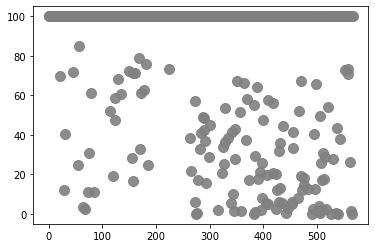

In [17]:
mostrarPoblacionRural("Oaxaca")


el promedio del porcentaje de población rural en Baja California Sur es:
 
                ESTADOS  POBLACION RURAL (MEDIA)
28  Baja California Sur                27.108233
 


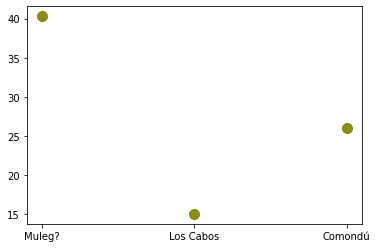

In [34]:
mostrarPoblacionRural("Baja California Sur")